# Homework # 2 - Exploratory Data Analysis & Data Preparation
Data files:
* white_wine_quality.csv - for Part 1: Exploratory Data Analysis
* shoppers.csv - for Part 2: Data Preparation

## Part 1: Exploratory Data Analysis

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

### Load data [white_wine_quality.csv]
#### Note: The field separator is ;

In [2]:
# Read data from file into dataframe
df = pd.read_csv("Data/white_wine_quality.csv", sep=";")

### Examine data

In [3]:
# Display dataframe shape
df.shape

(4898, 12)

In [4]:
# Display first few rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Generate summary statistics on data

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Generate insights on the dependent variable
#### Dependent  variable is quality

In [6]:
# Display the distinct classes
print(df["quality"].unique())

[6 5 7 8 4 3 9]


In [7]:
# Display the counts for each class
print(df["quality"].value_counts())

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64


<AxesSubplot:xlabel='Class', ylabel='Count'>

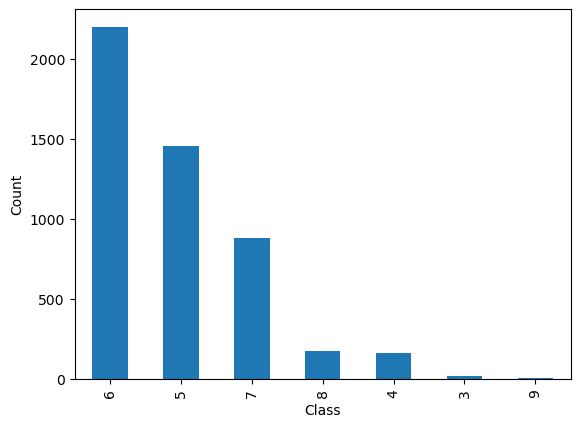

In [8]:
# Graph (i.e. bar graph) the distribution of the classes
df["quality"].value_counts().plot(kind='bar', xlabel="Class", ylabel="Count")

### Display the correlation matrix for all variables

In [29]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


<AxesSubplot:>

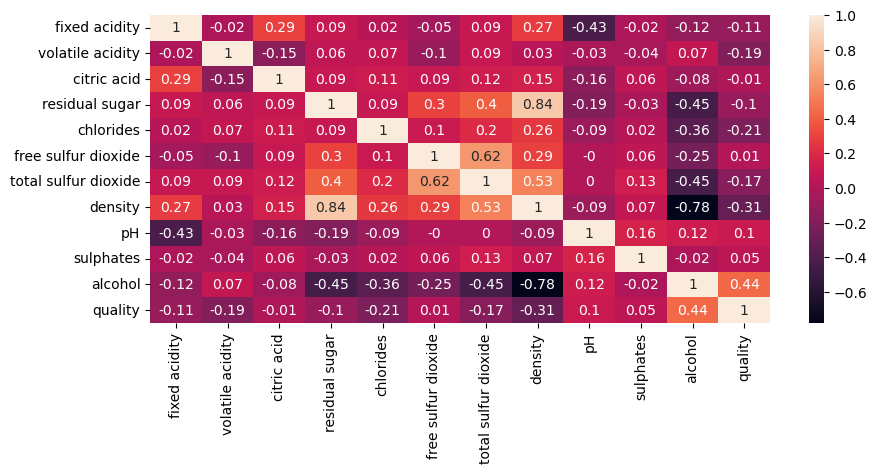

In [9]:
plt.figure(figsize = (10,4))
correlation_matrix = df.corr().round(2)
sns.heatmap(correlation_matrix, annot = True)


## Part 2: Data Preparation

### Import libraries

In [27]:
from sklearn.impute import SimpleImputer                 # for handling missing data
from sklearn.preprocessing import LabelEncoder           # for encoding label data

### Load data [shoppers.csv]

In [28]:
# Read data from file into dataframe
df1 = pd.read_csv("Data/shoppers.csv")

### Examine data

In [12]:
# Display dataframe
df1

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


### Identify missing values

In [13]:
df1.isnull().sum()

Region            0
Age               1
Income            1
Online Shopper    0
dtype: int64

### Impute missing values

In [14]:
# Create temporary dataframe 1 with only Age and Income columns
temp_df1 = df1[["Age", "Income"]]
temp_df1

,Age,Income
0,49.0,86400.0
1,32.0,57600.0
2,35.0,64800.0
3,43.0,73200.0
4,45.0,NaN
5,40.0,69600.0
6,NaN,62400.0
7,53.0,94800.0
8,55.0,99600.0
9,42.0,80400.0


In [15]:
# Replace missing values with mean of all the other values
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(temp_df1)

SimpleImputer()

In [16]:
# Create temporary dataframe 2 with post-imputation data
temp_df2 = pd.DataFrame(imp_mean.transform(temp_df1), columns=temp_df1.columns)
temp_df2
#df_orig = df.copy()

,Age,Income
0,49.000000,86400.000000
1,32.000000,57600.000000
2,35.000000,64800.000000
3,43.000000,73200.000000
4,45.000000,76533.333333
5,40.000000,69600.000000
6,43.777778,62400.000000
7,53.000000,94800.000000
8,55.000000,99600.000000
9,42.000000,80400.000000


In [17]:
# Drop Age and Income columns in original dataframe
df1.drop(['Age','Income'], axis = 1, inplace = True)
df1

,Region,Online Shopper
0,India,No
1,Brazil,Yes
2,USA,No
3,Brazil,No
4,USA,Yes
5,India,Yes
6,Brazil,No
7,India,Yes
8,USA,No
9,India,Yes


In [18]:
# Add imputed columns Age and Income to original dataframe
df1['Age'] = temp_df2['Age']
df1['Income'] = temp_df2['Income']

In [19]:
# Display updated dataframe
df1.head()

,Region,Online Shopper,Age,Income
0,India,No,49.0,86400.000000
1,Brazil,Yes,32.0,57600.000000
2,USA,No,35.0,64800.000000
3,Brazil,No,43.0,73200.000000
4,USA,Yes,45.0,76533.333333


### Generate one-hot encodings for Region column

In [20]:
# List unique values for Region
df1['Region'].unique()

array(['India', 'Brazil', 'USA'], dtype=object)

In [21]:
# Generate encodings for Region
df1_ohe = pd.get_dummies(df1['Region'])
df1_ohe

,Brazil,India,USA
0,0,1,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,1,0
6,1,0,0
7,0,1,0
8,0,0,1
9,0,1,0


In [22]:
# Join dataframe with Region-encoded dataframe
df2 = df1.join(df1_ohe)
df2

,Region,Online Shopper,Age,Income,Brazil,India,USA
0,India,No,49.000000,86400.000000,0,1,0
1,Brazil,Yes,32.000000,57600.000000,1,0,0
2,USA,No,35.000000,64800.000000,0,0,1
3,Brazil,No,43.000000,73200.000000,1,0,0
4,USA,Yes,45.000000,76533.333333,0,0,1
5,India,Yes,40.000000,69600.000000,0,1,0
6,Brazil,No,43.777778,62400.000000,1,0,0
7,India,Yes,53.000000,94800.000000,0,1,0
8,USA,No,55.000000,99600.000000,0,0,1
9,India,Yes,42.000000,80400.000000,0,1,0


In [23]:
# Drop Region column since it is now encoded
df2.drop(['Region'], axis=1, inplace=True)
df2

,Online Shopper,Age,Income,Brazil,India,USA
0,No,49.000000,86400.000000,0,1,0
1,Yes,32.000000,57600.000000,1,0,0
2,No,35.000000,64800.000000,0,0,1
3,No,43.000000,73200.000000,1,0,0
4,Yes,45.000000,76533.333333,0,0,1
5,Yes,40.000000,69600.000000,0,1,0
6,No,43.777778,62400.000000,1,0,0
7,Yes,53.000000,94800.000000,0,1,0
8,No,55.000000,99600.000000,0,0,1
9,Yes,42.000000,80400.000000,0,1,0


### Encode lables

In [24]:
# Encode Online Shopper column
le = LabelEncoder()
df2['Online Shopper']= le.fit_transform(df2['Online Shopper']) 

### Display final dataframe

In [25]:
df2

,Online Shopper,Age,Income,Brazil,India,USA
0,0,49.000000,86400.000000,0,1,0
1,1,32.000000,57600.000000,1,0,0
2,0,35.000000,64800.000000,0,0,1
3,0,43.000000,73200.000000,1,0,0
4,1,45.000000,76533.333333,0,0,1
5,1,40.000000,69600.000000,0,1,0
6,0,43.777778,62400.000000,1,0,0
7,1,53.000000,94800.000000,0,1,0
8,0,55.000000,99600.000000,0,0,1
9,1,42.000000,80400.000000,0,1,0
